In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [60]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
train.shape

(891, 12)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\Ebrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

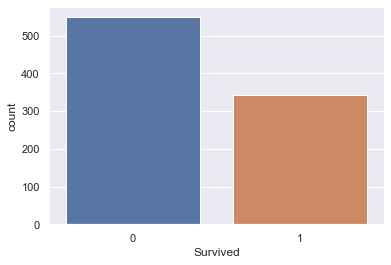

In [66]:
sns.countplot(train.Survived)

In [72]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [73]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [69]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [70]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [74]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [75]:
from sklearn.preprocessing import LabelEncoder

In [77]:
train = train.dropna()
test = test.dropna()
cols = ['Sex', 'Cabin', 'Embarked', 'Ticket']
train[cols] = train[cols].apply(LabelEncoder().fit_transform)
test[cols] = test[cols].apply(LabelEncoder().fit_transform)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,109,71.2833,72,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,31,53.1000,48,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,55,51.8625,117,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,120,16.7000,131,2
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,26,26.5500,43,2


In [78]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,109,71.2833,72,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,31,53.1000,48,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,55,51.8625,117,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,120,16.7000,131,2
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,26,26.5500,43,2
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,33,52.5542,91,2
872,873,0,1,"Carlsson, Mr. Frans Olof",1,33.0,0,0,89,5.0000,29,2
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,38,83.1583,61,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,10,30.0000,25,2


# Dropping Columns

In [79]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0,23.0,1,0,32,82.2667,12,2
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47.0,1,0,65,61.1750,58,2
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0,48.0,1,3,53,262.3750,15,0
26,918,1,"Ostby, Miss. Helene Ragnhild",0,22.0,0,1,9,61.9792,10,0
28,920,1,"Brady, Mr. John Bertram",1,41.0,0,0,7,30.5000,2,2
...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",1,43.0,1,0,28,27.7208,56,0
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",1,20.0,0,0,63,13.8625,55,0
407,1299,1,"Widener, Mr. George Dunton",1,50.0,1,1,8,211.5000,42,0
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.0,1,0,30,90.0000,41,1


In [86]:
X_train = train.drop(['Survived'], axis=1)
y_train = train['Survived']
X_test = test.drop(['Name'],axis = 1)

X_train.shape, y_train.shape, X_test.shape

X_test
X_train

X_train = X_train.drop('Name', axis = 1)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [88]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print("Logistic Regression Accuracy : ",acc_log_reg , '%')

Logistic Regression Accuracy :  77.05 %


C:\Users\Ebrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print("Support Vector Machine Accuracy : ",acc_svc,"%")

Support Vector Machine Accuracy :  67.21 %


In [90]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print("Linear Support Vector Machine Accuracy : ",acc_linear_svc,"%")

Linear Support Vector Machine Accuracy :  67.76 %


C:\Users\Ebrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [91]:
clf = KNeighborsClassifier(n_neighbors = 2)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print("KNN Accuracy : ", acc_knn,"%")

KNN Accuracy :  82.51 %


In [92]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print("Decision Tree Accuracy : ",acc_decision_tree,"%")

Decision Tree Accuracy :  100.0 %


In [93]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print("Random Forest Accuracy : ",acc_random_forest,"%")

Random Forest Accuracy :  100.0 %


In [94]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print("Navie Gauss Classifier Accuracy : ",acc_gnb,"%")

Navie Gauss Classifier Accuracy :  76.5 %


In [95]:
from copyreg import pickle
from flask import Flask, render_template
from requests import request
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pickle

# data
irisdata = load_iris()
# model
model = KNeighborsClassifier(n_neighbors=4)


xtrain, xtest, ytrain, ytest = train_test_split(irisdata.data, irisdata.target)

model.fit(xtrain, ytrain)
pickle.dump(model, open("model.pkl", 'wb'))
model = pickle.load(open('model.pkl', 'rb'))

loaded_model = pickle.load(open('model.pkl', 'rb'))
result3 = loaded_model.score(xtest, ytest)
print(result3)


0.9473684210526315
